In [85]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [86]:
train = pd.read_csv("Train.csv")
test = pd.read_csv("Test.csv")

In [87]:
train.head()

,Product,Product_Brand,Item_Category,Subcategory_1,Subcategory_2,Item_Rating,Date,Selling_Price
0,P-2610,B-659,bags wallets belts,bags,hand bags,4.3,2/3/2017,291.0
1,P-2453,B-3078,clothing,women s clothing,western wear,3.1,7/1/2015,897.0
2,P-6802,B-1810,home decor festive needs,showpieces,ethnic,3.5,1/12/2019,792.0
3,P-4452,B-3078,beauty and personal care,eye care,h2o plus eye care,4.0,12/12/2014,837.0
4,P-8454,B-3078,clothing,men s clothing,t shirts,4.3,12/12/2013,470.0


In [88]:
train.shape

(2452, 8)

In [89]:
test.shape

(1051, 7)

In [90]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2452 entries, 0 to 2451
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Product        2452 non-null   object 
 1   Product_Brand  2452 non-null   object 
 2   Item_Category  2452 non-null   object 
 3   Subcategory_1  2452 non-null   object 
 4   Subcategory_2  2452 non-null   object 
 5   Item_Rating    2452 non-null   float64
 6   Date           2452 non-null   object 
 7   Selling_Price  2452 non-null   float64
dtypes: float64(2), object(6)
memory usage: 153.4+ KB


In [91]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1051 entries, 0 to 1050
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Product        1051 non-null   object 
 1   Product_Brand  1051 non-null   object 
 2   Item_Category  1051 non-null   object 
 3   Subcategory_1  1051 non-null   object 
 4   Subcategory_2  1051 non-null   object 
 5   Item_Rating    1051 non-null   float64
 6   Date           1051 non-null   object 
dtypes: float64(1), object(6)
memory usage: 57.6+ KB


In [92]:
train.isnull().sum()

Product          0
Product_Brand    0
Item_Category    0
Subcategory_1    0
Subcategory_2    0
Item_Rating      0
Date             0
Selling_Price    0
dtype: int64

In [93]:
test.isnull().sum()

Product          0
Product_Brand    0
Item_Category    0
Subcategory_1    0
Subcategory_2    0
Item_Rating      0
Date             0
dtype: int64

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

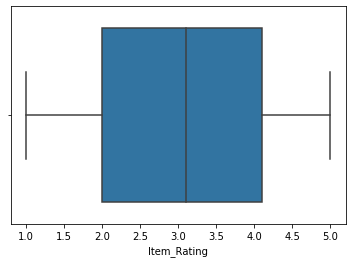

In [95]:
sns.boxplot(train['Item_Rating'])

In [96]:
#plt.scatter(train.Product_Brand, train.Selling_Price)

In [97]:
min_threshold, max_threshold = train.Selling_Price.quantile([0.001,0.999])

In [98]:
min_threshold, max_threshold

(66.255, 65415.49800000286)

In [99]:
train[train.Selling_Price > max_threshold]

,Product,Product_Brand,Item_Category,Subcategory_1,Subcategory_2,Item_Rating,Date,Selling_Price
261,P-1452,B-258,mobiles accessories,mobile accessories,headphones,3.4,11/3/2013,116289.0
1019,P-3089,B-793,furniture,living room,sofas sectionals,3.6,31/12/2015,70784.0
1364,P-1340,B-222,furniture,living room,sofas sectionals,2.0,31/12/2012,68393.0


In [100]:
train[train.Selling_Price < min_threshold]

,Product,Product_Brand,Item_Category,Subcategory_1,Subcategory_2,Item_Rating,Date,Selling_Price
1382,P-2832,B-733,pens stationery,office supplies,key chains,2.9,20/5/2020,64.0
1788,P-6769,B-1798,pens stationery,school supplies,pencils pen pencil boxes,4.8,25/3/2016,42.0
1950,P-10138,B-3078,toys school supplies,school supplies,geometry pencil boxes,2.5,1/12/2016,33.0


In [101]:
train_new = train[(train.Selling_Price  < max_threshold) & (train.Selling_Price  > min_threshold)]

In [102]:
train_new.head()

,Product,Product_Brand,Item_Category,Subcategory_1,Subcategory_2,Item_Rating,Date,Selling_Price
0,P-2610,B-659,bags wallets belts,bags,hand bags,4.3,2/3/2017,291.0
1,P-2453,B-3078,clothing,women s clothing,western wear,3.1,7/1/2015,897.0
2,P-6802,B-1810,home decor festive needs,showpieces,ethnic,3.5,1/12/2019,792.0
3,P-4452,B-3078,beauty and personal care,eye care,h2o plus eye care,4.0,12/12/2014,837.0
4,P-8454,B-3078,clothing,men s clothing,t shirts,4.3,12/12/2013,470.0


In [103]:
train.shape[0] - train_new.shape[0]

6

In [104]:
train_new.shape

(2446, 8)

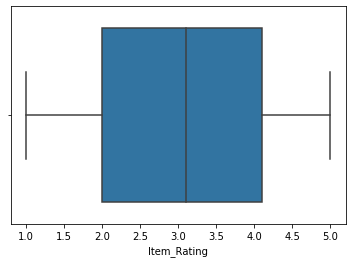

In [105]:
sns.boxplot(test['Item_Rating'])

In [106]:
target = train_new['Selling_Price']

In [107]:
cols = ['Selling_Price','Date','Product_Brand']
train_new = train_new.drop(cols, axis = 1)

In [108]:
train_data = train_new

In [109]:
train_data.head()

,Product,Item_Category,Subcategory_1,Subcategory_2,Item_Rating
0,P-2610,bags wallets belts,bags,hand bags,4.3
1,P-2453,clothing,women s clothing,western wear,3.1
2,P-6802,home decor festive needs,showpieces,ethnic,3.5
3,P-4452,beauty and personal care,eye care,h2o plus eye care,4.0
4,P-8454,clothing,men s clothing,t shirts,4.3


In [110]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
train_data["Product_1"] = lb_make.fit_transform(train_data["Product"])
train_data[["Product", "Product_1"]].head(11)

,Product,Product_1
0,P-2610,788
1,P-2453,757
2,P-6802,1740
3,P-4452,1209
4,P-8454,2098
5,P-5597,1472
6,P-8398,2084
7,P-10744,148
8,P-4042,1119
9,P-360,1024


In [111]:
train_data.drop("Product", axis = 1, inplace = True)

In [112]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
train_data["Item_Category_1"] = lb_make.fit_transform(train_data["Item_Category"])
train_data[["Item_Category", "Item_Category_1"]].head(11)

,Item_Category,Item_Category_1
0,bags wallets belts,7
1,clothing,10
2,home decor festive needs,29
3,beauty and personal care,8
4,clothing,10
5,home decor festive needs,29
6,footwear,24
7,kitchen dining,37
8,home decor festive needs,29
9,automotive,4


In [113]:
train_data.head()

,Item_Category,Subcategory_1,Subcategory_2,Item_Rating,Product_1,Item_Category_1
0,bags wallets belts,bags,hand bags,4.3,788,7
1,clothing,women s clothing,western wear,3.1,757,10
2,home decor festive needs,showpieces,ethnic,3.5,1740,29
3,beauty and personal care,eye care,h2o plus eye care,4.0,1209,8
4,clothing,men s clothing,t shirts,4.3,2098,10


In [114]:
train_data.drop("Item_Category", axis = 1, inplace = True)

In [115]:
train_data.head()

,Subcategory_1,Subcategory_2,Item_Rating,Product_1,Item_Category_1
0,bags,hand bags,4.3,788,7
1,women s clothing,western wear,3.1,757,10
2,showpieces,ethnic,3.5,1740,29
3,eye care,h2o plus eye care,4.0,1209,8
4,men s clothing,t shirts,4.3,2098,10


In [116]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
train_data["Sub_Category_1"] = lb_make.fit_transform(train_data["Subcategory_1"])
train_data[["Subcategory_1", "Sub_Category_1"]].head(11)

,Subcategory_1,Sub_Category_1
0,bags,10
1,women s clothing,127
2,showpieces,112
3,eye care,37
4,men s clothing,80
5,table decor handicrafts,116
6,women s footwear,128
7,cookware,28
8,wall decor clocks,124
9,accessories spare parts,2


In [117]:
train_data.drop("Subcategory_1", axis = 1, inplace = True)

In [118]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
train_data["Sub_Category_2"] = lb_make.fit_transform(train_data["Subcategory_2"])
train_data[["Subcategory_2", "Sub_Category_2"]].head(11)

,Subcategory_2,Sub_Category_2
0,hand bags,137
1,western wear,327
2,ethnic,101
3,h2o plus eye care,134
4,t shirts,294
5,showpieces,266
6,casual shoes,60
7,pots pans,230
8,paintings,216
9,car interior exterior,57


In [119]:
train_data.drop("Subcategory_2", axis = 1, inplace = True)

In [120]:
train_data.head()

,Item_Rating,Product_1,Item_Category_1,Sub_Category_1,Sub_Category_2
0,4.3,788,7,10,137
1,3.1,757,10,127,327
2,3.5,1740,29,112,101
3,4.0,1209,8,37,134
4,4.3,2098,10,80,294


In [121]:
train_data.drop("Product_1", axis = 1, inplace = True)

In [122]:
train_data.head()

,Item_Rating,Item_Category_1,Sub_Category_1,Sub_Category_2
0,4.3,7,10,137
1,3.1,10,127,327
2,3.5,29,112,101
3,4.0,8,37,134
4,4.3,10,80,294


In [123]:
test.head()

,Product,Product_Brand,Item_Category,Subcategory_1,Subcategory_2,Item_Rating,Date
0,P-11284,B-2984,computers,network components,routers,4.3,1/12/2018
1,P-6580,B-1732,jewellery,bangles bracelets armlets,bracelets,3.0,20/12/2012
2,P-5843,B-3078,clothing,women s clothing,western wear,1.5,1/12/2014
3,P-5334,B-1421,jewellery,necklaces chains,necklaces,3.9,1/12/2019
4,P-5586,B-3078,clothing,women s clothing,western wear,1.4,1/12/2017


In [124]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
test["Product_1"] = lb_make.fit_transform(test["Product"])
test[["Product", "Product_1"]].head(11)

,Product,Product_1
0,P-11284,114
1,P-6580,728
2,P-5843,652
3,P-5334,600
4,P-5586,624
5,P-11206,108
6,P-9966,1046
7,P-5367,608
8,P-9075,965
9,P-8852,947


In [125]:
test.drop("Product", axis = 1, inplace = True)

In [126]:
test.head()

,Product_Brand,Item_Category,Subcategory_1,Subcategory_2,Item_Rating,Date,Product_1
0,B-2984,computers,network components,routers,4.3,1/12/2018,114
1,B-1732,jewellery,bangles bracelets armlets,bracelets,3.0,20/12/2012,728
2,B-3078,clothing,women s clothing,western wear,1.5,1/12/2014,652
3,B-1421,jewellery,necklaces chains,necklaces,3.9,1/12/2019,600
4,B-3078,clothing,women s clothing,western wear,1.4,1/12/2017,624


In [127]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
test["Sub_Category_1"] = lb_make.fit_transform(test["Subcategory_1"])
test[["Subcategory_1", "Sub_Category_1"]].head(11)

,Subcategory_1,Sub_Category_1
0,network components,62
1,bangles bracelets armlets,8
2,women s clothing,90
3,necklaces chains,61
4,women s clothing,90
5,women s clothing,90
6,mobile accessories,58
7,rings,72
8,rings,72
9,women s clothing,90


In [128]:
test.drop("Subcategory_1", axis = 1, inplace = True)

In [129]:
test.head()

,Product_Brand,Item_Category,Subcategory_2,Item_Rating,Date,Product_1,Sub_Category_1
0,B-2984,computers,routers,4.3,1/12/2018,114,62
1,B-1732,jewellery,bracelets,3.0,20/12/2012,728,8
2,B-3078,clothing,western wear,1.5,1/12/2014,652,90
3,B-1421,jewellery,necklaces,3.9,1/12/2019,600,61
4,B-3078,clothing,western wear,1.4,1/12/2017,624,90


In [130]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
test["Sub_Category_2"] = lb_make.fit_transform(test["Subcategory_2"])
test[["Subcategory_2", "Sub_Category_2"]].head(11)

,Subcategory_2,Sub_Category_2
0,routers,136
1,bracelets,28
2,western wear,191
3,necklaces,114
4,western wear,191
5,western wear,191
6,speakers,152
7,unknown,180
8,unknown,180
9,lingerie sleep swimwear,100


In [131]:
test.drop("Subcategory_2", axis = 1, inplace = True)

In [132]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
test["Item_Category_1"] = lb_make.fit_transform(test["Item_Category"])
test[["Item_Category", "Item_Category_1"]].head(11)

,Item_Category,Item_Category_1
0,computers,13
1,jewellery,27
2,clothing,12
3,jewellery,27
4,clothing,12
5,clothing,12
6,mobiles accessories,31
7,jewellery,27
8,jewellery,27
9,clothing,12


In [133]:
test.drop("Item_Category", axis = 1, inplace = True)
test.drop("Product_Brand", axis = 1, inplace = True)
test.drop("Product_1", axis = 1, inplace = True)

In [134]:
test.head()

,Item_Rating,Date,Sub_Category_1,Sub_Category_2,Item_Category_1
0,4.3,1/12/2018,62,136,13
1,3.0,20/12/2012,8,28,27
2,1.5,1/12/2014,90,191,12
3,3.9,1/12/2019,61,114,27
4,1.4,1/12/2017,90,191,12


In [135]:
test = test.drop('Date', axis=1)

In [136]:
test.head()

,Item_Rating,Sub_Category_1,Sub_Category_2,Item_Category_1
0,4.3,62,136,13
1,3.0,8,28,27
2,1.5,90,191,12
3,3.9,61,114,27
4,1.4,90,191,12


In [137]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [138]:
from sklearn import ensemble
clf = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth = 5, min_samples_split = 2, 
      learning_rate = 0.1, loss = 'ls')

In [139]:
train_data.shape

(2446, 4)

In [140]:
target.shape

(2446,)

In [141]:
clf.fit(train_data, target)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=400,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [142]:
y_pred_test = clf.predict(test)

In [143]:
clf.score(test, y_pred_test)

1.0

In [144]:
test.head()

,Item_Rating,Sub_Category_1,Sub_Category_2,Item_Category_1
0,4.3,62,136,13
1,3.0,8,28,27
2,1.5,90,191,12
3,3.9,61,114,27
4,1.4,90,191,12


In [145]:
test.shape

(1051, 4)

In [146]:
y_pred_test.shape

(1051,)

In [147]:
target_1 = target[:1051]

In [148]:
from sklearn.metrics import r2_score

In [149]:
r2_score(target_1, y_pred_test)

-0.08684351923812672

In [150]:
from sklearn.metrics import mean_squared_error

In [151]:
mean_squared_error(target_1, y_pred_test,multioutput='raw_values')

array([44026161.28591466])

In [ ]:
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor

# clf = LGBMClassifier(learning_rate=0.05, colsample_bytree=0.3, reg_alpha=3, reg_lambda=3, max_depth=-1, n_estimators=2000, min_child_samples=15, num_leaves=141)
clf1 = XGBRegressor(n_estimators=2000,learning_rate=0.1,colsample_bytree=0.5,random_state=1994,min_child_samples=2)

clf1.fit(train_data, target)

y_pred_test = clf1.predict(test)

In [154]:
r2_score(target_1, y_pred_test)

-0.08684351923812672

In [153]:
y_pred_test = pd.Series(y_pred_test)
submission_df = pd.concat([y_pred_test],axis=1,keys=['Selling_Price']).reset_index(drop=True)
submission_df.round(2)

,Selling_Price
0,1181.42
1,689.59
2,941.02
3,1183.14
4,632.59
...,...
1046,2368.51
1047,1978.23
1048,-220.13
1049,172.85


In [382]:
submission_df.round(2).to_csv(index=False,path_or_buf='submission_pricep.csv')